In [1]:
from matplotlib.image import imread
img = imread(r"G:\Thesis\Radiograph\Main-Radiograph\Cropped\1.jpg")


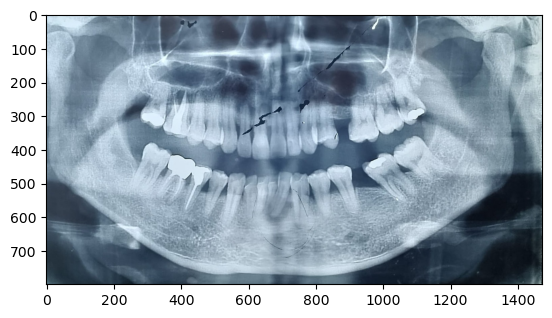

In [2]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [3]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(799, 1473, 3)


In [4]:
height = img.shape[0]
width = img.shape[1]
channel = img.shape[2]
print(height, width, channel)

799 1473 3


In [5]:
shape = height*width*channel
print(shape)

3530781


In [10]:
# saving the data to .txt file and later regenerate the image
import numpy as np
flatten_img = np.reshape(img, (shape, ))
print(flatten_img.shape)
np.savetxt(r'G:\Python\Numpy\output.txt', flatten_img, fmt='%d')
# Load the data from the text file
loaded_data = np.loadtxt(r'G:\Python\Numpy\output.txt', dtype=int)

print("Type of Loaded Data:", type(loaded_data))
print(loaded_data.shape)
loaded_data = loaded_data.reshape(height, width, channel)
plt.imshow(loaded_data)
plt.axis('off')


(3530781,)


KeyboardInterrupt: 

In [11]:
print(img.shape)
print(flatten_img.shape)

(799, 1473, 3)
(3530781,)


In [12]:
import pprint
pprint.pprint(flatten_img[:100])

array([209, 227, 239, 206, 224, 236, 202, 220, 232, 200, 218, 230, 200,
       218, 230, 201, 219, 231, 200, 218, 230, 199, 217, 229, 199, 217,
       229, 200, 218, 230, 201, 219, 231, 202, 220, 232, 203, 221, 233,
       202, 220, 232, 202, 220, 232, 201, 219, 231, 201, 221, 232, 197,
       217, 228, 192, 212, 223, 189, 209, 220, 188, 208, 219, 189, 209,
       220, 192, 212, 223, 196, 216, 227, 199, 219, 230, 189, 209, 220,
       183, 203, 214, 188, 208, 219, 194, 214, 225, 196, 216, 227, 196,
       216, 227, 196, 216, 227, 197, 217, 228, 198], dtype=uint8)


In [13]:
flatten_img = flatten_img.reshape(1, height, width, channel)
print(type(flatten_img))
print(flatten_img.shape)

<class 'numpy.ndarray'>
(1, 799, 1473, 3)


(-0.5, 1472.5, 798.5, -0.5)

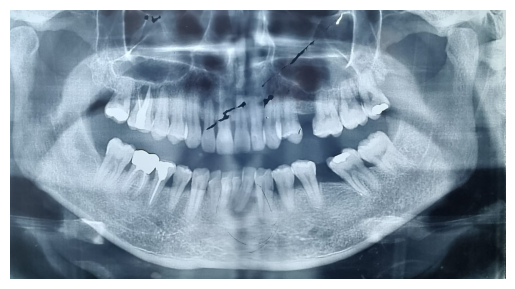

In [14]:
plt.imshow(flatten_img[0])
plt.axis('off')

(54,)
Type: <class 'numpy.ndarray'> and Shape: (2, 3, 3, 3)


(-0.5, 2.5, 2.5, -0.5)

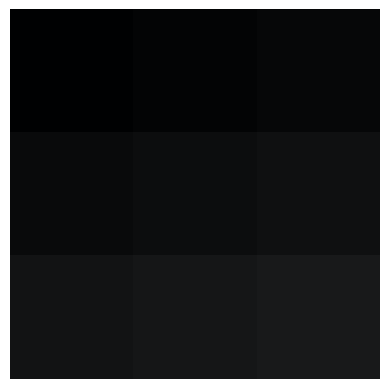

In [15]:
img = np.arange(54)
print(img.shape)
img = img.reshape(2, 3, 3, 3)
print(f'Type: {type(img)} and Shape: {img.shape}')
# pprint.pprint(img)
plt.imshow(img[0])
plt.axis('off')

# Numpy Zero Array

In [16]:
num_train = 5000
num_test = 500
# do not forget to pass tuple, hence the double bracket (())
dist = np.zeros((num_test, num_train))
print(dist.shape)

(500, 5000)


# Broadcasting

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:


In [17]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print('X')
pprint.pprint(x)
print(f'Shape: {x.shape}')
print(x[0])
print('========================')

v = np.array([1, 0, 1])
print('V')
pprint.pprint(v)
print(f'Shape: {v.shape}')
print('========================')

y = np.zeros_like(x)   # Create an empty matrix with the same shape as x
print('Y')
pprint.pprint(y)
print(f'Shape: {y.shape}')
print('========================')

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(x.shape[0]):
    y[i] = x[i] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print('Final')
print(y)
print(f'Shape: {y.shape}')

X
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])
Shape: (4, 3)
[1 2 3]
V
array([1, 0, 1])
Shape: (3,)
Y
array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])
Shape: (4, 3)
Final
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]
Shape: (4, 3)


This works; however when the matrix x is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix x is equivalent to forming a matrix vv by stacking multiple copies of v vertically, then performing elementwise summation of x and vv. We could implement this approach like this:

In [18]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [19]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"


[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Application of broadcasting

In [20]:
import numpy as np

# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

[[ 4  5]
 [ 8 10]
 [12 15]]
[[2 4 6]
 [5 7 9]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 5  6  7]
 [ 9 10 11]]
[[ 2  4  6]
 [ 8 10 12]]


example suppose you got this two array on shape is X_train = (10, 27), and X_test = (5, 27). What you need to do is find the l2 distance for each of the testing images for given train images. each of the test image is going to be compared with the each training images and find the l2 distance.


In [90]:
train=np.random.randint(5*5, size=(25))
test = np.arange(3*5)

train = train.reshape(5, 5)
test = test.reshape(3, 5)

# print("Train:")
# print(train)
# print("=========================")
# print("Test")
# print(test)
# print("=========================")

num_train = train.shape[0]
num_test = test.shape[0]

dist = np.zeros((num_test, num_train))
# print(dist)

# not at all vectorized code - TWO LOOPS!!!!!
for i in range(num_test):
    for j in range(num_train):
        dist[i][j] = np.sqrt(np.sum((test[i] - train[j])**2))
    
pprint.pprint(dist)
print("=========================")
 
# this is partial vectorized code - ONE LOOP!!!!!!
for i in range(num_test):    
    dist[i] = np.sqrt(np.sum((test[i] - train)**2, axis=1))
       
pprint.pprint(dist)
print("=========================")

# fully vectorized code - NO LOOPS!!!!!!!!

dist = np.sqrt((np.sum(test**2, axis=1, keepdims=True) + np.sum(train**2, axis=1) - 2*np.matmul(test, train.T)))
pprint.pprint(dist)
print("=========================")

Train:
[[ 3  9 22 13  6]
 [ 7  2 20  4  9]
 [13 13 16 17 10]
 [ 8  2  9 23 21]
 [12 20 21 16  5]]
Test
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
array([[24.0208243 , 20.        , 27.22131518, 28.33725463, 32.18695388],
       [16.4924225 , 14.31782106, 16.61324773, 19.94993734, 22.82542442],
       [14.73091986, 16.1245155 ,  7.81024968, 15.58845727, 16.        ]])
array([[24.0208243 , 20.        , 27.22131518, 28.33725463, 32.18695388],
       [16.4924225 , 14.31782106, 16.61324773, 19.94993734, 22.82542442],
       [14.73091986, 16.1245155 ,  7.81024968, 15.58845727, 16.        ]])
array([[24.0208243 , 20.        , 27.22131518, 28.33725463, 32.18695388],
       [16.4924225 , 14.31782106, 16.61324773, 19.94993734, 22.82542442],
       [14.73091986, 16.1245155 ,  7.81024968, 15.58845727, 16.        ]])


# Cross Validation

In [155]:
test_set = np.arange(50*100).reshape(50, 100)
train_set = np.arange(30*100).reshape(30, 100)

numfolds=5
test_set_split = np.array_split(test_set, numfolds)
train_set_split = np.array_split(train_set, numfolds)


i=0
print(len(train_set_split[:i:]))

X_train_fold = np.concatenate(test_set_split[:i] + test_set_split[i + 1:], axis=0)


# exclude_fold_index = 1
# selected_test_folds = [fold for i, fold in enumerate(test_set_split) if i != exclude_fold_index]
# selected_train_folds = [fold for i, fold in enumerate(train_set_split) if i != exclude_fold_index]

# train_set_split = np.array(selected_test_folds)
# train_set_split= np.reshape(train_set_split, ((numfolds-1)*train_set_split.shape[1], -1))
print(X_train_fold.shape)

# print(len(test_set_split))
# print(len(train_set_split))
# for i in range(len(test_set_split)):
#     print(test_set_split[i].shape[1])

0
(40, 100)


# numpy.argsort()

In [23]:
print(dist[0])
sorting = np.argsort(dist, axis=0)
print(sorting)
# print(dist[0][sorting[0]])

[24.2693222  21.14237451 21.54065923 28.68797658 19.46792233]
[[2 1 1 2 1]
 [1 2 2 1 2]
 [0 0 0 0 0]]


In [24]:
def predict_labels(self, dists, k):
    """
    Given a matrix of distances between test points and training points,
    predict a label for each test point.

    Inputs:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      gives the distance between the ith test point and the jth training point.
    - k: The number of nearest neighbors to consider.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].
    """
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test, dtype=int)

    for i in range(num_test):
        # Find indices of k nearest neighbors
        closest_indices = np.argsort(dists[i])[:k]
        
        for i in closest_indices:
            closest_labels.append(self.y_train[i])

        # Get labels of k nearest neighbors
        closest_labels = self.y_train[closest_indices]

        # Find the most common label
        y_pred[i] = np.argmax(np.bincount(closest_labels))



    return y_pred


In [25]:
import random

arr = np.random.randint(0, 11, size=3*27)
arr = arr.reshape(3, 27)

# print(arr)

labels = np.random.randint(0, 10, size=27)
print(f'Labels: {labels}')

num_test = arr.shape[0]
predicted_label=[]
k=1

for i in range(num_test):
    
    closest_indices = np.argsort(arr[i])[:k]
#     print(arr[i])
#     print(f'Sorted Index: {np.argsort(arr[i])}')
    print(f'Closest Indices: {closest_indices}')

    # Get labels of k nearest neighbors
    closest_labels = labels[closest_indices]
    print(f'Closest Labels: {closest_labels}')
    
    
#     sortIdx = np.argsort(arr[i])
#     x=0
#     j = sortIdx[x]
# #     find the list of image indexes that matched with the i(th) test image
#     while(arr[i][j] == 0):
#         label = labels[j] 
#         predicted_label.append(label)
#         x+=1
#         j=sortIdx[x]
#     print(f'Predicted label: {i} = {predicted_label}')
    
#     counts = {}
#     for num in predicted_label:
#         counts[num] = counts.get(num, 0) + 1
#     for key, value in counts.items():
#         if value == max(counts.values()):
#             most_common_elements = key
#     print(f"Most common elements: {most_common_elements}")

#     list.clear()
#     predicted_label.clear()
    


Labels: [2 9 6 7 0 6 3 0 6 3 1 9 7 7 9 1 9 1 6 9 7 4 7 7 1 1 8]
Closest Indices: [15]
Closest Labels: [1]
Closest Indices: [26]
Closest Labels: [8]
Closest Indices: [6]
Closest Labels: [3]


In [26]:
arr = np.random.randint(0, 9, size=40)
print(arr)
print(np.bincount(arr))
print(np.argmax(np.bincount(arr)))

[7 5 8 1 5 1 8 0 5 0 1 6 6 1 3 2 7 8 5 7 1 7 1 4 4 2 0 0 1 3 7 7 8 4 1 1 3
 2 1 3]
[ 4 10  3  4  3  4  2  6  4]
1


# Vectorized vs Non vectorized operation

In [27]:
a   = np.random.randint(0,4, size=4)
b   = np.random.randint(6,9, size=4)

print("A",a)
print("B",b)

# vectorized
print(f'Results(vectorized): {a+b}')

# non-vectorized
# Explicit loop for addition
result = np.zeros(4)
for i in range(4):
    result[i] = a[i] + b[i]

print("Result(non-vectorized):", result)


A [0 3 3 0]
B [8 8 6 8]
Results(vectorized): [ 8 11  9  8]
Result(non-vectorized): [ 8. 11.  9.  8.]


# Matrix Multiplication


In [41]:
test = np.random.randint(0, 5, size=9).reshape(3, 3)
train = np.random.randint(6, 9, size=15).reshape(5, 3)

print(test)
print(train)
# print(train.T)
multiply = np.matmul(test, train.T)
square = np.square(test)

print(np.matmul(test, test))

[[0 3 1]
 [4 4 0]
 [2 1 4]]
[[8 7 6]
 [8 6 8]
 [8 7 7]
 [8 8 6]
 [8 8 7]]
[[14 13  4]
 [16 28  4]
 [12 14 18]]
